In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm import tqdm

In [2]:
af_metrics = pd.read_csv('<path/to/your/concatenated_AF2_score_file.sc>',index_col=0)

In [3]:
len(af_metrics)

36055

In [4]:
ppi_metrics = pd.DataFrame()
for sc in tqdm(glob('<path/to/your>/ppi_scores/*.sc')):
    ppi_metrics = ppi_metrics.append(pd.read_csv(sc,sep='\s+',skiprows=1))
len(ppi_metrics)

100%|██████████| 36055/36055 [06:42<00:00, 89.59it/s] 


36055

In [5]:
ppi_metrics

,SCORE:,total_score,buns_heavy_ball_1.1D,contact_molec_sq5_apap_target,contact_molecular_surface,contact_molecular_surface_apap_target,contact_patch,ddg,ddg_hydrophobic,dslf_fa13,...,presap_score,pro_close,rama_prepro,ref,sbuns5.0_heavy_ball_1.1D,score_per_res,score_per_res_linker,ss_sc,vbuns5.0_heavy_ball_1.1D,description
0,SCORE:,-786.684,3.0,1711.704,320.150,107.820,0.082,-19.494,-3.851,-1.330,...,54.158,29.989,17.527,-30.578,0.0,-2.670,-2.709,0.784,6.0,hit6_reloop_355_0_14_af2pred_0001
0,SCORE:,-778.990,3.0,2432.266,474.109,187.379,0.001,-39.820,-18.521,-1.372,...,59.960,48.479,26.675,-39.158,3.0,-2.525,-2.642,0.802,2.0,CSM8_reloop_146_0_10_af2pred_0001
0,SCORE:,-780.748,0.0,-1.000,-1.000,-1.000,-1.000,0.000,0.000,-1.304,...,55.246,20.295,8.747,-65.207,0.0,-2.838,-3.618,0.623,0.0,hit6_swap_29_0_12_af2pred_0001
0,SCORE:,-761.086,0.0,44.002,55.650,2.513,-1.000,-3.272,-0.068,-1.403,...,56.845,26.147,20.393,-86.195,0.0,-2.952,-2.778,0.752,0.0,CSM8_reloop_1146_0_13_af2pred_0001
0,SCORE:,-821.945,0.0,2849.738,425.190,188.684,0.464,-35.991,-17.097,-1.379,...,54.368,26.011,12.362,-87.263,0.0,-2.873,-3.212,0.779,4.0,CSM8_reloop_1461_0_13_af2pred_0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,SCORE:,-815.664,4.0,3115.489,551.022,209.625,-1.000,-52.923,-17.265,-1.353,...,60.017,19.916,12.612,-65.535,3.0,-3.080,-3.046,0.782,2.0,hit6_swap_1459_0_8_af2pred_0001
0,SCORE:,-750.672,0.0,0.165,3.279,0.030,0.030,0.145,-0.006,-1.314,...,57.954,32.276,16.764,-32.230,0.0,-2.895,-2.340,0.796,0.0,hit6_reloop_631_0_12_af2pred_0001
0,SCORE:,-783.417,1.0,2135.637,421.708,155.273,-1.000,-36.706,-12.386,-1.338,...,57.321,26.227,21.431,-33.934,1.0,-2.926,-2.953,0.789,1.0,CSM8_reloop_1277_0_4_af2pred_0001
0,SCORE:,-820.472,0.0,2359.755,530.492,189.488,0.000,-48.646,-17.932,-1.352,...,55.914,18.195,10.510,-54.929,0.0,-2.844,-3.347,0.729,1.0,hit6_reloop_316_0_12_af2pred_0001


In [6]:
ppi_metrics['name'] = ppi_metrics['description'].map(lambda x: '_'.join(x.split('_')[:-1]))

metrics = af_metrics.merge(ppi_metrics,left_on='description',right_on='name',how='inner')
len(metrics)

36055

In [8]:
metrics.to_csv('<desired/path/to>/ppi_scores.csv')
metrics

,file,SCORE:_x,pae_binder,pae_interaction,pae_interaction1,pae_interaction2,pae_target,plddt_binder,plddt_target,plddt_total,...,pro_close,rama_prepro,ref,sbuns5.0_heavy_ball_1.1D,score_per_res,score_per_res_linker,ss_sc,vbuns5.0_heavy_ball_1.1D,description_y,name_y
0,CSM8_259_4.sc,SCORE:,5.278,7.142,8.388,5.895,2.797,84.315,94.995,91.696,...,22.236,14.073,-58.969,1.0,-3.215,-3.157,0.793,0.0,CSM8_swap_1180_0_1_af2pred_0001,CSM8_swap_1180_0_1_af2pred
1,CSM8_259_4.sc,SCORE:,7.112,10.930,12.625,9.234,2.862,72.970,93.575,87.211,...,23.022,16.430,-10.299,3.0,-2.622,-3.005,0.772,0.0,CSM8_swap_1180_0_2_af2pred_0001,CSM8_swap_1180_0_2_af2pred
2,CSM8_259_4.sc,SCORE:,5.206,5.630,6.685,4.574,2.764,87.022,95.801,93.089,...,26.670,18.354,-73.418,0.0,-3.038,-3.191,0.811,2.0,CSM8_swap_1180_0_3_af2pred_0001,CSM8_swap_1180_0_3_af2pred
3,CSM8_259_4.sc,SCORE:,5.889,19.671,20.401,18.940,2.873,81.863,93.909,90.188,...,27.326,15.569,-77.214,0.0,-2.983,-2.684,0.801,1.0,CSM8_swap_1180_0_4_af2pred_0001,CSM8_swap_1180_0_4_af2pred
4,CSM8_259_4.sc,SCORE:,4.967,5.527,6.457,4.597,2.755,87.283,95.603,93.033,...,30.564,14.538,-60.717,0.0,-3.048,-2.934,0.805,1.0,CSM8_swap_1180_0_5_af2pred_0001,CSM8_swap_1180_0_5_af2pred
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36050,hit6_267_0.sc,SCORE:,3.750,24.337,24.524,24.151,2.865,90.575,96.027,94.230,...,22.804,8.785,-70.740,0.0,-3.210,-2.843,0.802,0.0,hit6_reloop_1135_0_16_af2pred_0001,hit6_reloop_1135_0_16_af2pred
36051,hit6_267_0.sc,SCORE:,4.155,8.673,9.131,8.216,2.898,85.964,94.646,91.785,...,23.251,17.595,-78.186,1.0,-3.076,-3.298,0.768,3.0,hit6_reloop_1259_0_1_af2pred_0001,hit6_reloop_1259_0_1_af2pred
36052,hit6_267_0.sc,SCORE:,3.807,8.835,9.174,8.496,2.864,87.508,94.934,92.486,...,27.779,16.974,-47.220,1.0,-2.930,-3.181,0.787,2.0,hit6_reloop_1259_0_2_af2pred_0001,hit6_reloop_1259_0_2_af2pred
36053,hit6_267_0.sc,SCORE:,4.228,6.236,6.983,5.489,2.824,87.434,95.262,92.682,...,21.609,17.956,-67.992,3.0,-2.885,-3.662,0.758,3.0,hit6_reloop_1259_0_3_af2pred_0001,hit6_reloop_1259_0_3_af2pred


In [2]:
metrics = pd.read_csv('<path/to/your>/ppi_scores.csv',index_col=0) #same one as above

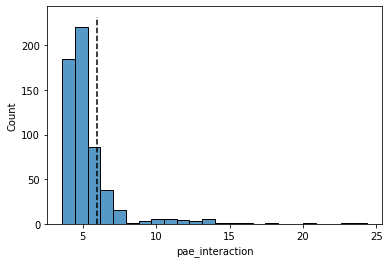

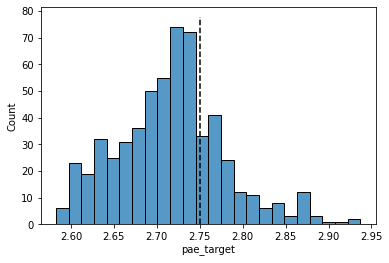

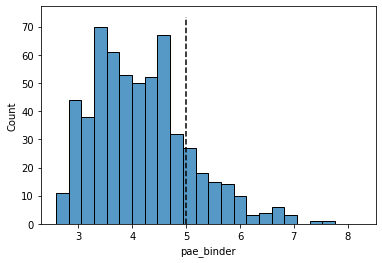

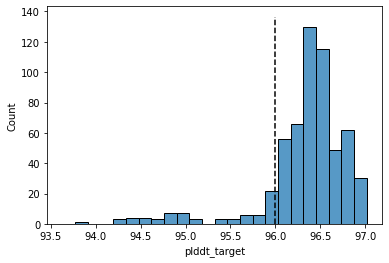

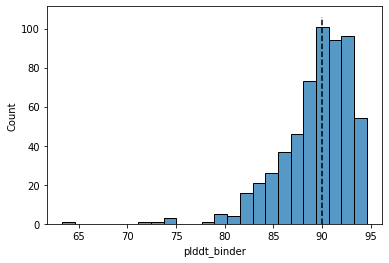

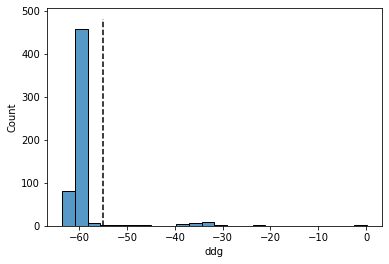

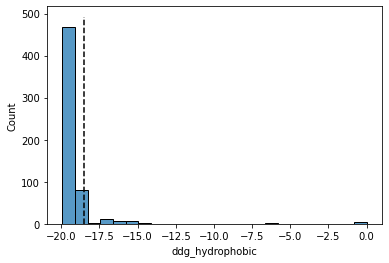

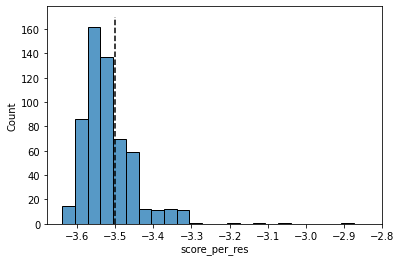

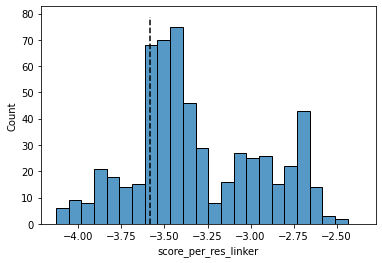

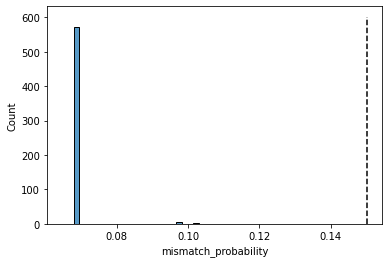

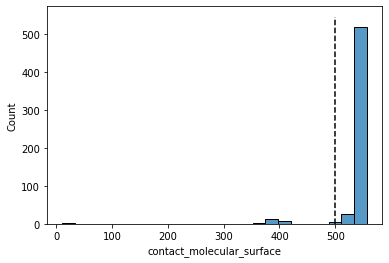

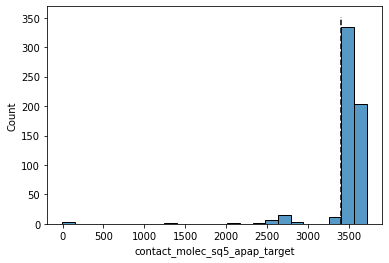

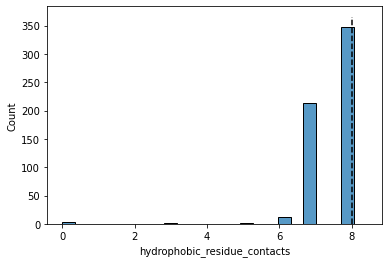

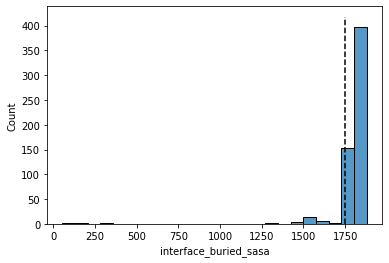

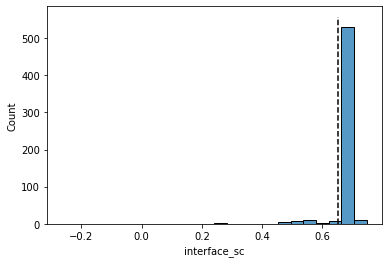

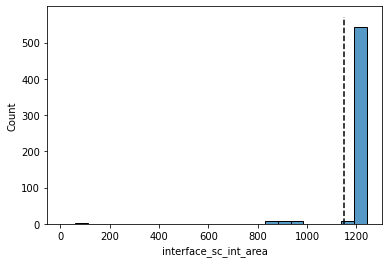

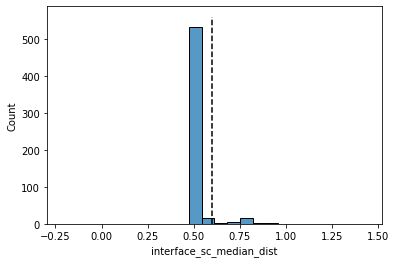

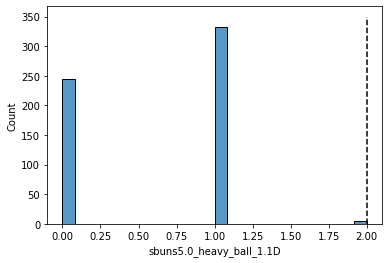

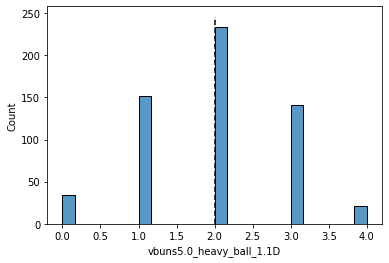

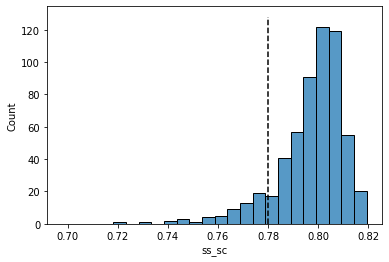

In [7]:
terms_and_cuts = {
    'pae_interaction':  [6,  False],
    'pae_target':       [2.75,  False],
    'pae_binder':       [5,  False],
    'plddt_target' :    [96, True],
    'plddt_binder':     [90,  True],
    #'has_cys':          [0, False],
    'ddg':                           [-55,  False], #recommended: -40 or 50%, whichever has more
    'ddg_hydrophobic':               [-18.5, False],
    'score_per_res' :                [-3.5, False], #recommended: no filter or -2.4
    'score_per_res_linker':          [-3.583, False],
    'mismatch_probability':          [0.15,  False], #recommended: 0.1
    'contact_molecular_surface':     [500,   True], #recommended: 450
    #'contact_patch':                 [195,   True], #recommended: max out
    'contact_molec_sq5_apap_target': [3400,  True], #recommended: max out
    #'delta_sap_target':              [9,  True], #recommended: max out
    #'delta_sap_binder':              [16,    True], #recommended: between 12 and 23 (but maxing out here)
    #'binder_blocked_sap':            [15.75,   False], #recommended: 15
    'hydrophobic_residue_contacts':  [8, True],
    'interface_buried_sasa':         [1750, True],
    'interface_sc':                  [0.65, True],
    'interface_sc_int_area':         [1150, True],
    'interface_sc_median_dist':      [0.60, False],
    'sbuns5.0_heavy_ball_1.1D':      [2, False],
    'vbuns5.0_heavy_ball_1.1D':      [2, False],
    'ss_sc':                         [0.78, True]
}

for term in terms_and_cuts:
    plt.figure()
    
    vals = metrics[term]
    vals = vals[~np.isnan(vals)]
    
    bins = np.linspace(np.quantile(vals,0.001),np.quantile(vals,0.999),25)
        
    sns.histplot(vals,bins=bins)

    plt.plot([terms_and_cuts[term][0]]*2,plt.ylim(),'k--')

In [8]:
filtered_CSM8 = metrics.copy()
filter_info = []
for term in terms_and_cuts:
    
    if terms_and_cuts[term][1]: #if higher better
        pass_rate = np.mean(metrics[term] >= terms_and_cuts[term][0])
        filtered_CSM8 = filtered_CSM8[filtered_CSM8[term] >= terms_and_cuts[term][0]]
    else: #lower better
        pass_rate = np.mean(metrics[term] <= terms_and_cuts[term][0])
        filtered_CSM8 = filtered_CSM8[filtered_CSM8[term] <= terms_and_cuts[term][0]]
        
    filter_info.append([term,terms_and_cuts[term][0],pass_rate])
    
print('Pass rate: {}\tNum Passes: {}'.format(len(filtered_CSM8)/len(metrics),len(filtered_CSM8)))
filter_info = pd.DataFrame(filter_info,columns=['filter','cut','pass rate'])
filter_info

Pass rate: 0.041237113402061855	Num Passes: 24


,filter,cut,pass rate
0,pae_interaction,6.000,0.814433
1,pae_target,2.750,0.749141
2,pae_binder,5.000,0.829897
3,plddt_target,96.000,0.883162
4,plddt_binder,90.000,0.513746
5,ddg,-55.000,0.939863
6,ddg_hydrophobic,-18.500,0.945017
7,score_per_res,-3.500,0.713058
8,score_per_res_linker,-3.583,0.194158
9,mismatch_probability,0.150,1.000000


In [9]:
filtered.to_csv('<desired/path/to>/orderable_with_metrics.csv')
print(len(filtered))

95
